In [1]:
import os
import pandas as pd
from dotenv import load_dotenv
import seaborn as sns
import matplotlib.pyplot as plt

load_dotenv()

DATA_PATH3 = os.getenv("DATA_PATH3")
DATA_PATH = os.getenv('DATA_PATH')
DATA_PATH4 = os.getenv("DATA_PATH4")
MERGE_PATH = os.getenv("MERGE_PATH")

In [2]:
df1 = pd.read_csv(DATA_PATH)
df1.head()

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


In [3]:
df2 = pd.read_csv(DATA_PATH4)
df2.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
merged_df = pd.merge(df1, df2, left_on='artist', right_on='artists' , how='inner')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23851 entries, 0 to 23850
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              23851 non-null  int64  
 1   title             23851 non-null  object 
 2   published_at      23851 non-null  object 
 3   updated_at        23851 non-null  object 
 4   category          23851 non-null  object 
 5   nominee           23851 non-null  object 
 6   artist            23851 non-null  object 
 7   workers           7337 non-null   object 
 8   img               23233 non-null  object 
 9   winner            23851 non-null  bool   
 10  artists           23851 non-null  object 
 11  album_name        23851 non-null  object 
 12  track_name        23851 non-null  object 
 13  popularity        23851 non-null  int64  
 14  duration_ms       23851 non-null  int64  
 15  explicit          23851 non-null  bool   
 16  danceability      23851 non-null  float6

### Remove the unneeded columns for our analysis

In [5]:
to_eliminate = ['artists', 'updated_at', 'published_at']
merged_df = merged_df.drop(columns=to_eliminate)
merged_df.head()

,year,title,category,nominee,artist,workers,img,winner,album_name,track_name,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",bad guy,...,-10.965,1,0.3750,0.328,0.13000,0.1000,0.562,135.128,4,electro
1,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True,Halloween & Chill,Lost Cause,...,-8.494,0,0.2410,0.705,0.00751,0.0577,0.518,75.051,4,electro
2,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True,pov: it's 2021,Therefore I Am,...,-7.773,0,0.0697,0.218,0.13000,0.0550,0.716,94.009,4,electro
3,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True,Отново на училище,bad guy,...,-10.965,1,0.3750,0.328,0.13000,0.1000,0.562,135.128,4,electro
4,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True,Halloween Songs | Witches Hour,bury a friend,...,-14.505,1,0.3490,0.739,0.14300,0.1060,0.205,120.035,4,electro


### Change the data type in order to have a good analysis

In [6]:
for i in merged_df.columns:
    if merged_df[i].dtype == 'object':
        merged_df[i] = merged_df[i].astype('string')

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23851 entries, 0 to 23850
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              23851 non-null  int64  
 1   title             23851 non-null  string 
 2   category          23851 non-null  string 
 3   nominee           23851 non-null  string 
 4   artist            23851 non-null  string 
 5   workers           7337 non-null   string 
 6   img               23233 non-null  string 
 7   winner            23851 non-null  bool   
 8   album_name        23851 non-null  string 
 9   track_name        23851 non-null  string 
 10  popularity        23851 non-null  int64  
 11  duration_ms       23851 non-null  int64  
 12  explicit          23851 non-null  bool   
 13  danceability      23851 non-null  float64
 14  energy            23851 non-null  float64
 15  key               23851 non-null  int64  
 16  loudness          23851 non-null  float6

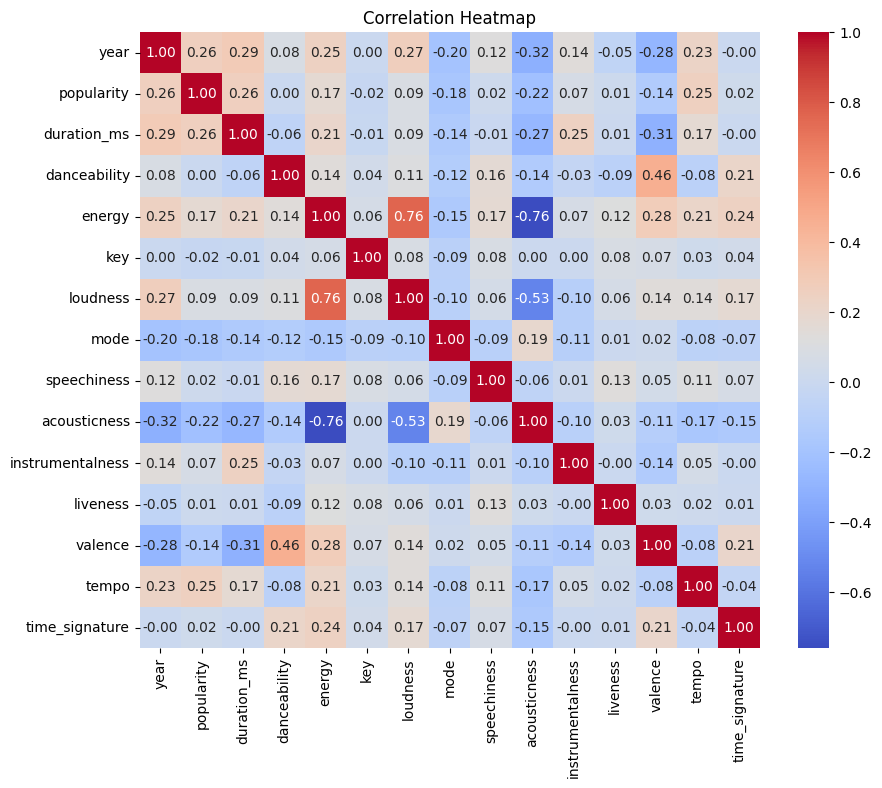

In [16]:
num_data = merged_df.select_dtypes(include=['float64', 'int64'])
correlation = num_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#### The heat map shows us the correlation between the songs characteristics, it seems that there is only one correlation, between loudness and energy and a little correlation between daceability and valence. However, there's no correlation or (it's negative) between the other columns

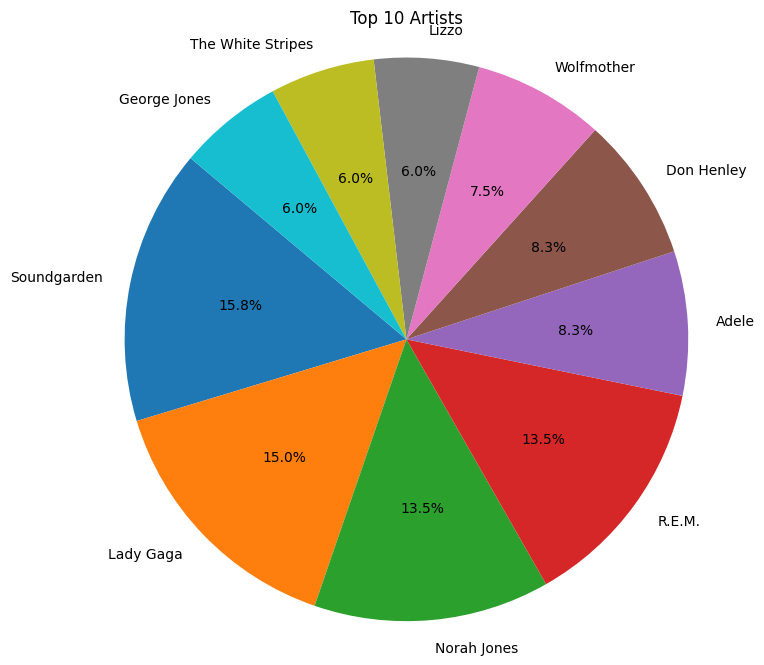

In [17]:
def pie_chart_top10_nominee_track(merged_df):
    artist_award_counts = {}

    for index, row in merged_df.iterrows():
        nominee = row['nominee']
        track_name = row['track_name']
        artist = row['artist']
        
        if nominee == track_name:
            if artist in artist_award_counts:
                artist_award_counts[artist] += 1
            else:
                artist_award_counts[artist] = 1
    
    sorted_artists = sorted(artist_award_counts, key=artist_award_counts.get, reverse=True)
    top10_artists = sorted_artists[:10]
    awards = [artist_award_counts[artist] for artist in top10_artists]
    
    plt.figure(figsize=(8, 8))
    plt.pie(awards, labels=top10_artists, autopct='%1.1f%%', startangle=140)
    plt.title('Top 10 Artists')
    plt.axis('equal')
    plt.show()

pie_chart_top10_nominee_track(merged_df)


#### This pie chart shows us the top 10 artist with more songs nominated, for our analysis, we will take the first 4, i mean, Soundgarden, Lady Gaga, Norah Jones

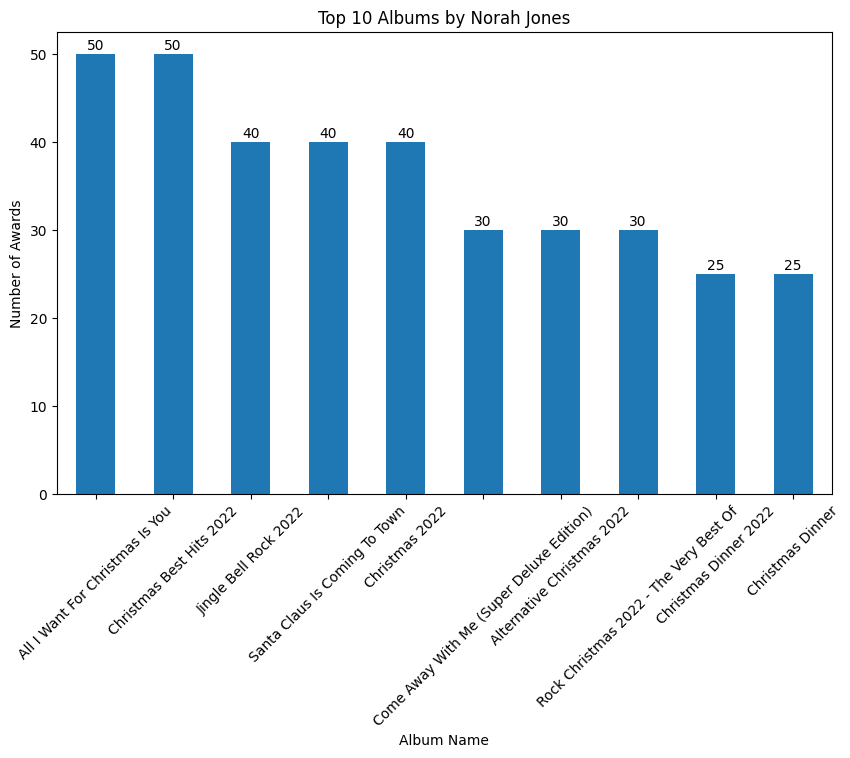

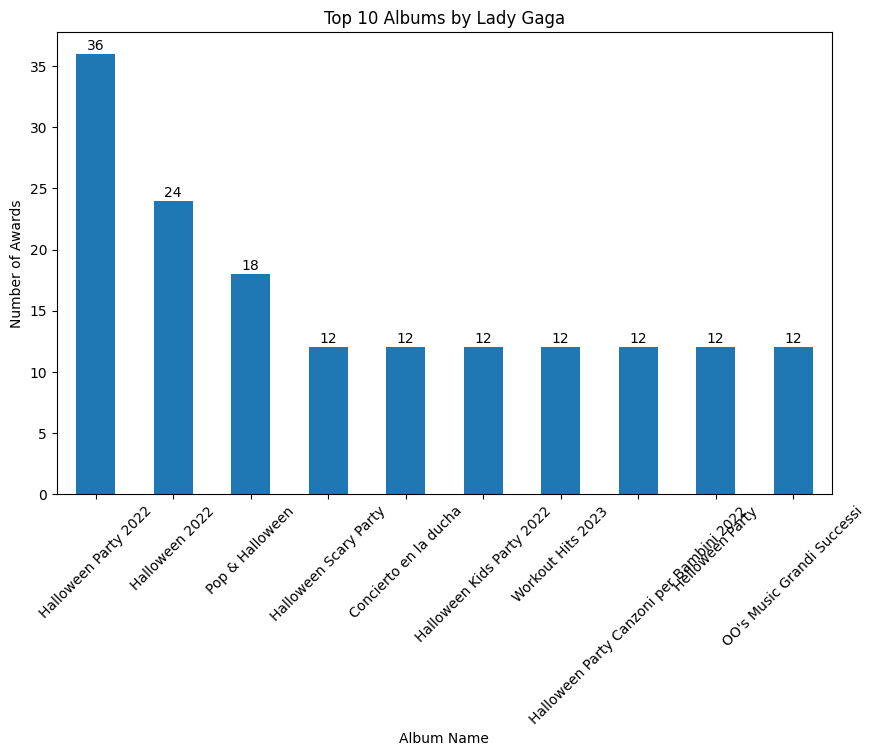

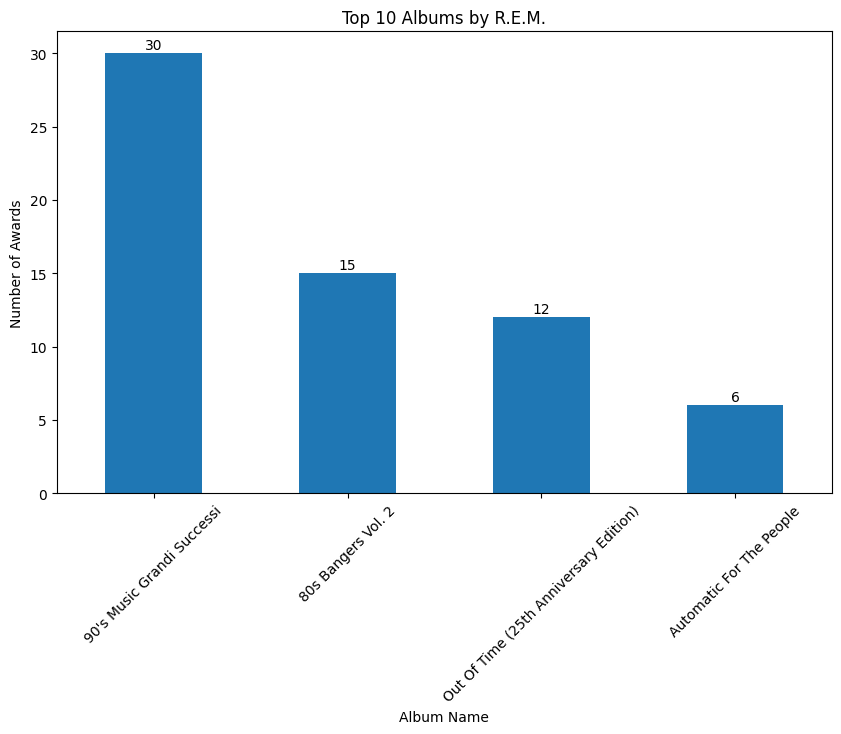

In [18]:
top_artist = ['Soundgarden', 'Lady Gaga', 'Norah Jones', 'R.E.M.']

def top_albums_by_artists(merged_df):
    artist_nominee_counts = {}
    
    for artist in merged_df['artist']:
        if artist in top_artist:
            if artist in artist_nominee_counts:
                artist_nominee_counts[artist] += 1
            else:
                artist_nominee_counts[artist] = 1
    
    sorted_artists = sorted(artist_nominee_counts, key=artist_nominee_counts.get, reverse=True)
    
    for artist in sorted_artists[:3]:
        artist_df = merged_df[merged_df['artist'] == artist]      
        top_albums = artist_df['album_name'].value_counts().head(10)
        
        plt.figure(figsize=(10, 6))
        top_albums.plot(kind='bar')
        plt.title(f'Top 10 Albums by {artist}')
        plt.xlabel('Album Name')
        plt.ylabel('Number of Awards')
        plt.xticks(rotation=45)
        for i, value in enumerate(top_albums.values):
            plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
        plt.show()

top_albums_by_artists(merged_df)

#### In the top albums of each artist that I chose, we can see that the topic of them is, usually, holidays throughout the year, except for R.E.M., in his case we have Rock and music from the last century.

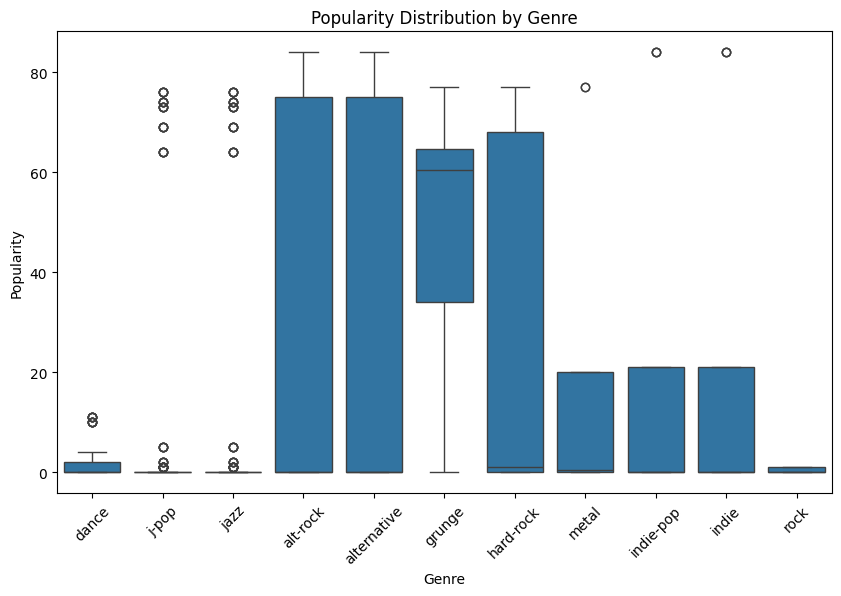

In [19]:
def pie_chart_top10_nominee_track(merged_df, top_artist):
    genre_popularity = {}

    for index, row in merged_df.iterrows():
        artist = row['artist']
        popularity = row['popularity']
        genre = row['track_genre']

        if artist in top_artist:
            # Popularidad por género
            if genre in genre_popularity:
                genre_popularity[genre].append(popularity)
            else:
                genre_popularity[genre] = [popularity]

    # Convertir los datos de popularidad por género en un DataFrame
    genre_popularity_data = []
    for genre, popularity_list in genre_popularity.items():
        for popularity in popularity_list:
            genre_popularity_data.append({'Genre': genre, 'Popularity': popularity})
    genre_popularity_df = pd.DataFrame(genre_popularity_data)

    # Crear un gráfico de caja (boxplot) de la popularidad por género
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Genre', y='Popularity', data=genre_popularity_df)
    plt.xlabel('Genre')
    plt.ylabel('Popularity')
    plt.title('Popularity Distribution by Genre')
    plt.xticks(rotation=45)
    plt.show()

# Llama a la función con tu dataframe merged_df y la lista de los artistas top_artist
top_artist = ['Soundgarden', 'Lady Gaga', 'Norah Jones', 'R.E.M.']
pie_chart_top10_nominee_track(merged_df, top_artist)

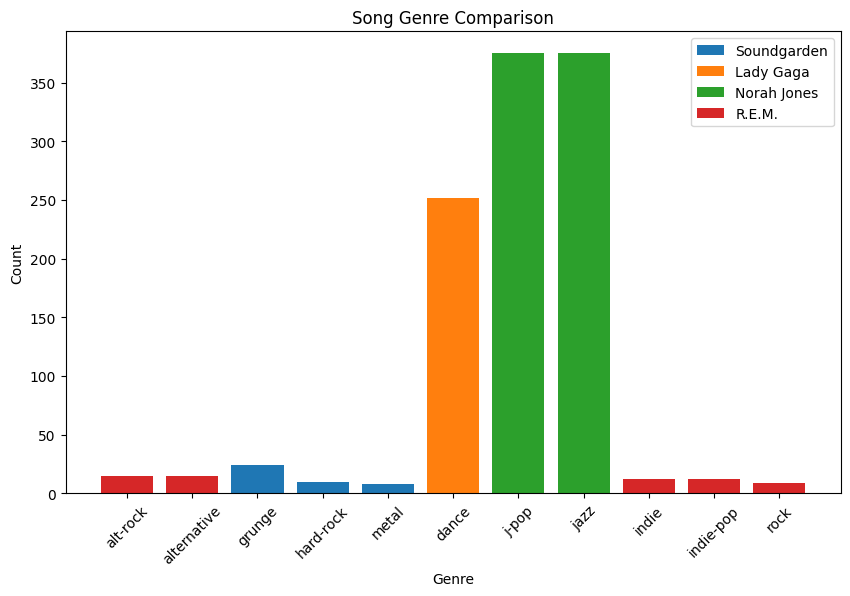

In [23]:
def compare_artist_genre(merged_df, top_artist):
    filtered_df = merged_df[merged_df['artist'].isin(top_artist)]
    genre_counts = filtered_df.groupby(['artist', 'track_genre']).size().reset_index(name='count')
    
    plt.figure(figsize=(10, 6))
    for artist in top_artist:
        artist_genre_counts = genre_counts[genre_counts['artist'] == artist]
        plt.bar(artist_genre_counts['track_genre'], artist_genre_counts['count'], label=artist)

    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.title('Song Genre Comparison')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
    
top_artist = ['Soundgarden', 'Lady Gaga', 'Norah Jones', 'R.E.M.']
compare_artist_genre(merged_df, top_artist)

#### For this case, we have two graphics, in those we can see the genre’s popularity and artist’s genres popularity. Surprisingly, there are popular genres like grunge or alt-rock that are not too used by the artist, on the other hand, there are other genres more used by the artist like j-pop which aren’t too popular

In [21]:
def average_metrics_for_top_artists(merged_df, top_artist):
    filtered_df = merged_df[merged_df['artist'].isin(top_artist)]
    average_metrics = filtered_df.groupby('artist')[merged_df.columns[10:23]].mean()
    return average_metrics

average_metrics_df = average_metrics_for_top_artists(merged_df, top_artist)
average_metrics_df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence
artist,,,,,,,,,,,,,
Lady Gaga,1.333333,248056.238095,0.261905,0.718619,0.802381,6.238095,-4.715952,0.571429,0.059024,0.052510,0.000313,0.242579,0.635929
Norah Jones,4.873333,195280.220000,0.000000,0.486120,0.322552,4.686667,-10.721493,0.986667,0.037398,0.695513,0.036680,0.126011,0.288733
R.E.M.,23.190476,263128.380952,0.000000,0.511333,0.822762,7.380952,-7.273381,0.571429,0.032690,0.147571,0.002362,0.065467,0.739476
Soundgarden,32.551724,297934.241379,0.000000,0.363828,0.823931,4.793103,-5.838241,0.862069,0.040938,0.000481,0.058904,0.150583,0.355793


#### In the description, we can observe that Lady Gaga and Norah Jones maybe are not too popular like R.E.M. or Soundgarden, however, Lady Gaga songs have more danceability than other artist, the speechiness is almost the same in all the artist. Also, Soundgarden, being the most popular artist, he has one of the most low valence and acousticness.  This information show us that there's no perfect artist, those four are the best and some values on their sons are really low.

In [22]:
merged_df.to_csv(MERGE_PATH, index=False)